In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise2/size


## Analysis of results with double precision

In [3]:
methods = ['mkl', 'oblas', 'blis']
precision = ['float', 'double']
placement = ['default', 'close', 'spread']

In [4]:
df = pd.DataFrame(columns=['Size', 'Time', 'GFLOPS', 'precision', 'method', 'placement'])
df

,Size,Time,GFLOPS,precision,method,placement


In [5]:
for pl in placement:
    for m in methods:
        for prec in precision:
            file_pattern = f"{pl}/{m}_{prec}_*.csv"

            # Get a list of file paths matching the pattern
            file_paths = glob.glob(file_pattern)

            # Initialize an empty list to store DataFrames
            dfs = []

            # Loop through each file and read it into a DataFrame, then add it to the list
            for file_path in file_paths:
                df_temp = pd.read_csv(file_path)
                dfs.append(df_temp)

            # Concatenate all DataFrames in the list into a single DataFrame
            df_temp = pd.concat(dfs, ignore_index=True)
            df_temp['precision'] = prec
            df_temp['method'] = m
            df_temp['placement'] = pl

            # Display the combined DataFrame
            df = pd.concat([df, df_temp])

In [6]:
df

,Size,Time,GFLOPS,precision,method,placement
0,17000,7.735007,1270.328572,float,mkl,default
1,17000,7.746844,1268.387497,float,mkl,default
2,17000,7.896495,1244.349510,float,mkl,default
3,17000,7.846685,1252.248630,float,mkl,default
4,17000,7.850607,1251.622953,float,mkl,default
...,...,...,...,...,...,...
90,11000,4.253914,625.776632,double,blis,spread
91,11000,4.169207,638.490688,double,blis,spread
92,11000,4.169147,638.499853,double,blis,spread
93,11000,4.252468,625.989385,double,blis,spread


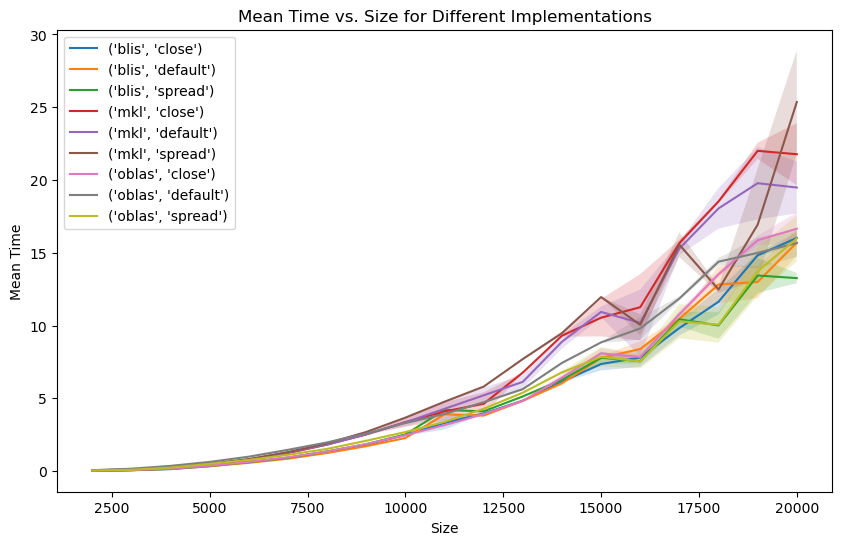

In [7]:
grouped_double = df[df['precision']=='double']
grouped_double.drop(columns=['precision'])

grouped_double = grouped_double.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_double['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

# Add labels and legend
plt.title('Mean Time vs. Size for Different Implementations')
plt.xlabel('Size')
plt.ylabel('Mean Time')
plt.legend()

# Show the plot
plt.show()


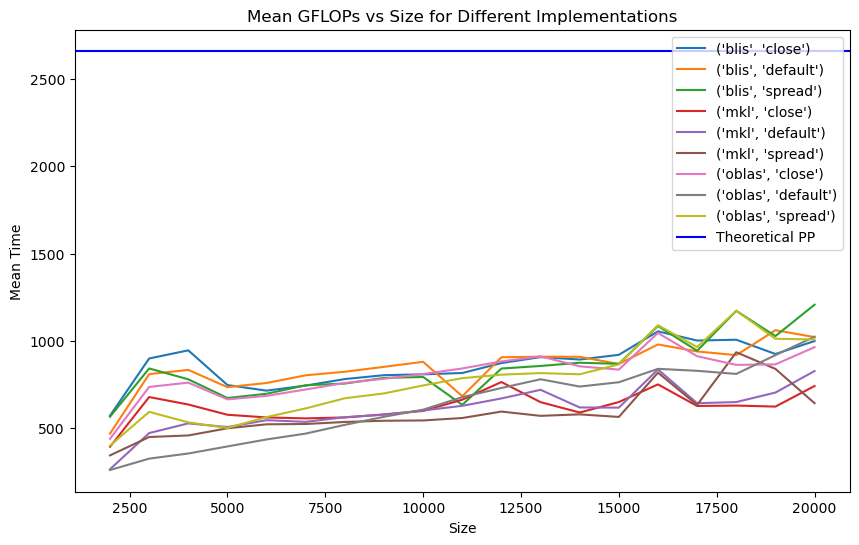

In [8]:
grouped_double = df[df['precision']=='double']
grouped_double.drop(columns=['precision'])

grouped_double = grouped_double.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_double['GFLOPS'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0)

# Add labels and legend
plt.title('Mean GFLOPs vs Size for Different Implementations')
plt.xlabel('Size')
plt.ylabel('Mean Time')
plt.axhline(y = 2662.4, color = 'b', label = "Theoretical PP")
plt.legend()

# Show the plot
plt.show()

In [46]:
print(agg_df)

    method placement   Size        mean         min          max         std
0     blis     close   2000  408.563407  394.946911   415.513196    8.272726
1     blis     close   3000  634.272156  588.729551   656.389822   30.755608
2     blis     close   4000  657.985767  533.138478   904.038326  144.643866
3     blis     close   5000  552.895573  544.876554   561.715447    6.131863
4     blis     close   6000  593.526359  581.379106   600.721732    7.863731
..     ...       ...    ...         ...         ...          ...         ...
166  oblas    spread  16000  998.996245  850.349239  1052.181698   84.079834
167  oblas    spread  17000  942.688588  881.471408  1017.459771   50.049286
168  oblas    spread  18000  903.341252  862.966972   965.242334   53.166992
169  oblas    spread  19000  855.238013  845.589635   861.458721    7.429541
170  oblas    spread  20000  996.835257  954.956435  1087.866931   53.738177

[171 rows x 7 columns]


- - - 
